**Nhóm 7**

|STT|	Họ và tên|	MSSV	|Email|
|-|--|--|--|
|1|	Trần Hoàng Khang	|19521671|	19521671@gm.uit.edu.vn|
|2|	Nguyễn Tú Ngọc	|20521665	|20521665@gm.uit.edu.vn|




**LAB 4.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1vD0i34RVMFKXdvDmnZmejmTQ-tNm5xcB?usp=sharing

## **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Lab/Lab4/Dataset/'

In [ ]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv(data_dir + 'urldata.csv')
data0.head()
# Comment the meaning of ech feature. Ex: 'Have_IP'?
# 'Right_click' is allow to right click to show more info about website

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [ ]:
#Check shape
data0.shape

(10000, 18)

In [ ]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng. 

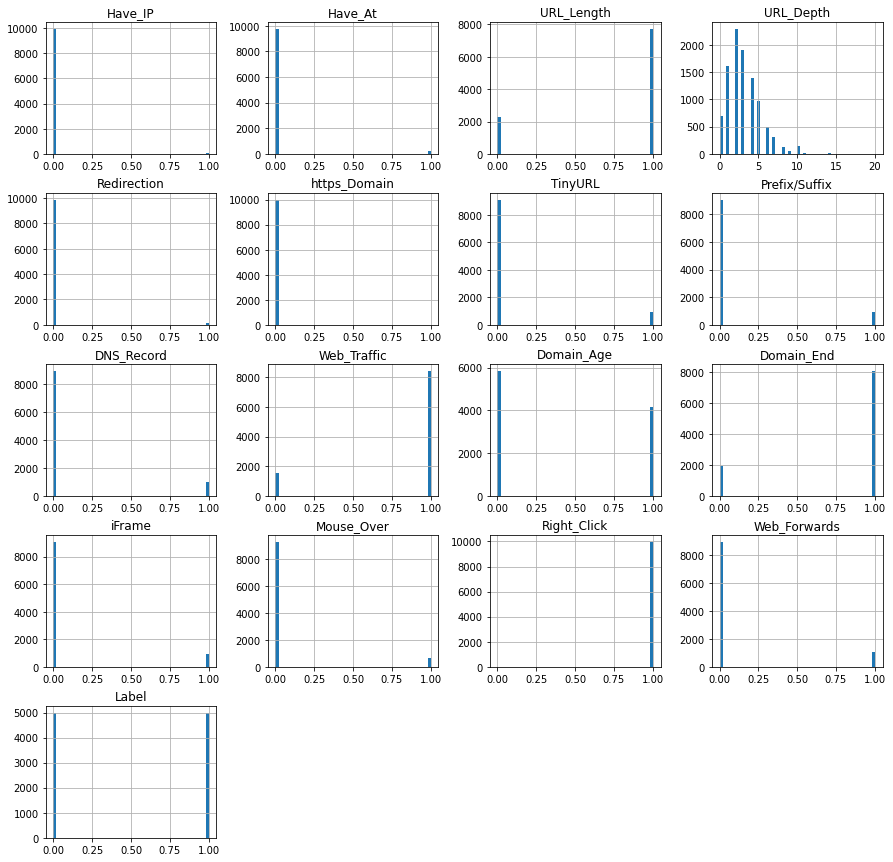

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

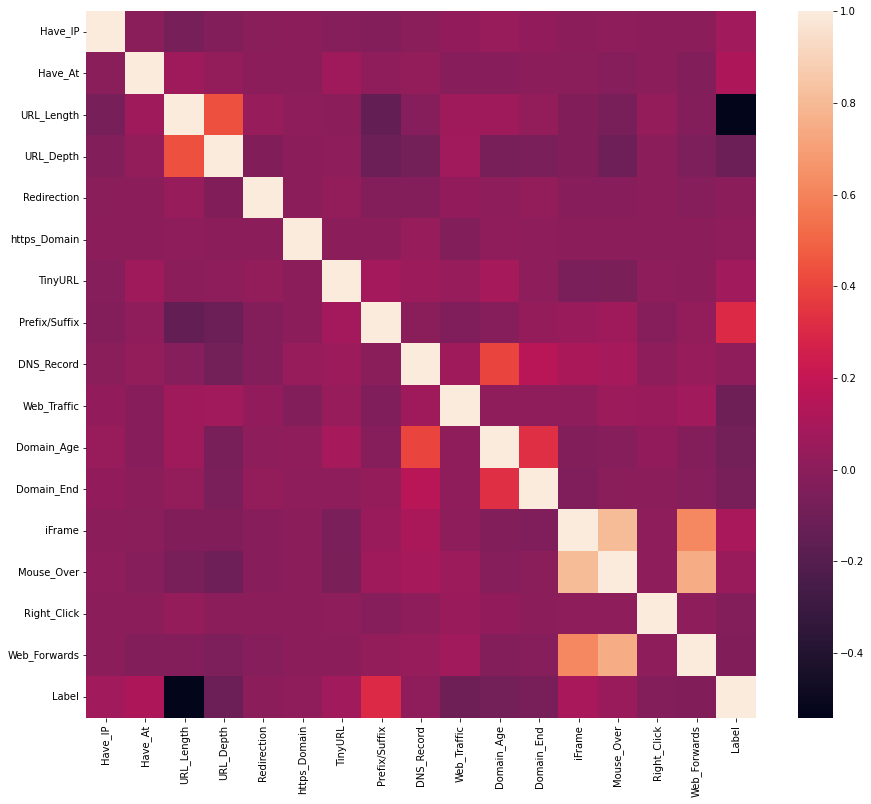

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngoại trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
#check data null 
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
# shuffling the rows 
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,1,0,1,0,1


# **6. Chia dữ liệu**

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting 
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [ ]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.811
Decision Tree: Accuracy on test Data: 0.823


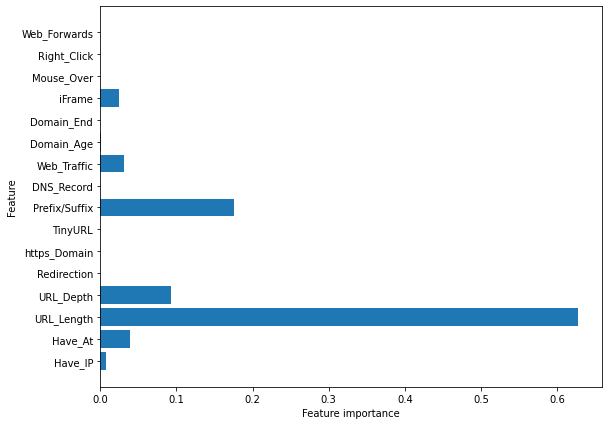

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate 
forest = RandomForestClassifier(max_depth=5)

# fit 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting 
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.816
Random forest: Accuracy on test Data: 0.827


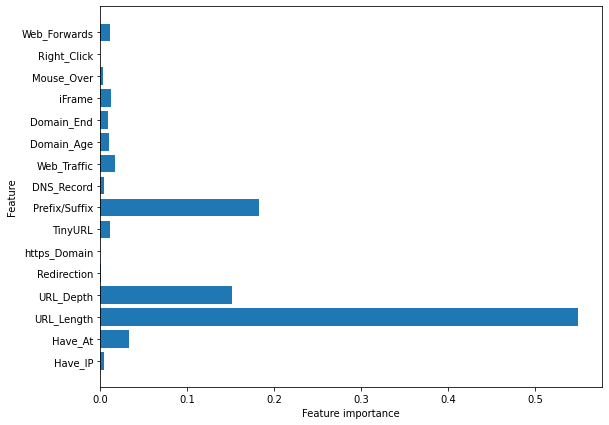

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate 
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit  
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting 
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.861
Multilayer Perceptrons: Accuracy on test Data: 0.859


**Lưu trữ kết quả**

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
#predicting 
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy 
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.867


**Lưu trữ kết quả**

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Autoencoder Neural Network**
***Bài tập số 1: Hoàn thành huấn luyến mô hình ANN.***

Sơ lược: "Autoencoder" là một model hay thuật toán nén dữ liệu trong đó các chức năng nén và giải nén là 1) data-specific, 2) lossy, and 3) learned automatically from examples thay vì do con người thiết kế. Ngoài ra, trong hầu hết các ngữ cảnh mà thuật ngữ "Autoencoder" được sử dụng, các chức năng nén và giải nén được triển khai với mạng thần kinh.

Tìm hiểu một cách details với 3 từ khóa trên tại link sau: https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 16  # 32 floats -> Lấy số chiều input của mình là 16, sau khi bỏ 'Domain' và 'label' và chia cho 24.5
# nhưng số chiều encoding không được là số thập phân nên mình lấy giá trị 16. 
# Theo nhiều nguồn tham khảo thì `encoding_dim` nên là 7, 16, 32

# Đây là input image đối với dữ liệu dạng ảnh. Mình có thể sử dụng lại cho mô hình phân loại của chúng
input_img = keras.Input(shape=(16,)) # Chỉnh lại số chiều input theo dữ liệu của mình, sau khi bỏ 'Domain' và 'label' thì còn 16 cột.

# "encoded" là layer dạng encode đại diện cho input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" là layer dạng  lossy reconstruction của input.
decoded = layers.Dense(16, activation='sigmoid')(encoded) # Chỉnh lại theo số chiều dữ liệu của mình ở đây

#  model sẽ maps (ánh xạ) một input vào một reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# Còn model này sẽ map input thành bản bị encoded của nó
encoder = keras.Model(input_img, encoded)

In [ ]:
# Đây là input (đã bị encoded) với số chiều 16 
encoded_input = keras.Input(shape=(encoding_dim,))
# Lấy output layer từ model Autoencoder
decoder_layer = autoencoder.layers[-1]
# Tạo model Decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                #validation_split=0.2,
                validation_data=(X_test, X_test)
                )

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 0.2573 - accuracy: 0.6708 - val_loss: 0.0652 - val_accuracy: 0.8410
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: -0.1483 - accuracy: 0.8455 - val_loss: -0.3462 - val_accuracy: 0.8410
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: -0.5869 - accuracy: 0.8453 - val_loss: -0.7939 - val_accuracy: 0.8410
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: -1.0690 - accuracy: 0.8453 - val_loss: -1.2923 - val_accuracy: 0.8410
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: -1.6259 - accuracy: 0.8453 - val_loss: -1.8811 - val_accuracy: 0.8410
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: -2.2844 - accuracy: 0.8453 - val_loss: -2.5767 - val_accuracy: 0.8410
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: -3.0602 - accuracy: 0.8453 - val_loss: -3.3953 - val_accuracy: 0.8410
Epoch 8/

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 1ms/step - loss: -203.2171 - accuracy: 0.8410

Autoencoder: Accuracy on training Data: 0.845
Autoencoder: Accuracy on test Data: 0.841


In [ ]:
storeResults('Autoencoder Neural Network', acc_train_auto, acc_test_auto) # Lưu trữ kết quả 

## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In ra nhiều chỉ số theo sách giáo khoa cho màu mè ^____^, khỏi mất công dùng hàm của người ta. Hiệu suất này đang lấy theo **Test Data**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Accuracy: ", round((tp + tn) / (tp + tn + fp + fn), 8))
print('False positive rate(FPR): ', round(fp / (fp + tn), 8))
print('False negative rate(FN): ', round(fn / (fn + tp), 8))
recall = round(tp / (tp + fn), 8)
print('Recall(TPR): ', recall)
precision = round(tp / (tp + fp), 8)
print('Precision: ', precision)
print('F1 score: ', round((2 * precision * recall) / (precision + recall), 8))

Accuracy:  0.8115
False positive rate(FPR):  0.02366864
False negative rate(FN):  0.35801217
Recall(TPR):  0.64198783
Precision:  0.96347032
F1 score:  0.77054169


In [ ]:
#predicting 
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy 
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_svm))

XGBoost: Accuracy on training Data: 0.800
XGBoost : Accuracy on test Data: 0.811


In [ ]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

# **8. So sánh các mô hình**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.811,0.823
1,Random Forest,0.816,0.827
2,Multilayer Perceptrons,0.861,0.858
3,XGBoost,0.866,0.867
4,Autoencoder Neural Network,0.845,0.841
5,Support Vector Machines,0.800,0.812


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.866,0.867
2,Multilayer Perceptrons,0.861,0.858
4,Autoencoder Neural Network,0.845,0.841
1,Random Forest,0.816,0.827
0,Decision Tree,0.811,0.823
5,Support Vector Machines,0.800,0.812


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

*\<Các bước lưu chỉ số và kết quả so sánh mình đã thực hiện ở trên một cách mỹ miều nên ở đây mình không trình bày lại nữa\>*

Lưu trữ model của keras của mục [7.5](#scrollTo=7_5_Autoencoder_Neural_Network)

In [ ]:
autoencoder.save("/content/drive/MyDrive/Lab/Lab4/Output Model/AutoencoderNN.h5")

In [ ]:
!ls "/content/drive/MyDrive/Lab/Lab4/Output Model/"

AutoencoderNN.h5


# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 4.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hợp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv' 

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv -O /content/drive/MyDrive/Lab/Lab4/online-valid.csv

URL transformed to HTTPS due to an HSTS policy
--2022-12-03 17:13:09--  https://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.177.85, 104.16.101.75, 2606:4700::6810:654b, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1670087599&Signature=gcBnvXJ~AUw7RsOG16ScJ-j56DWZ7R~jZtYmNGMOQ0Isnut6stpJVSLVbfEo1pjyYyXEjCpaHvisnbgPFCc7nPY7PchBOoIWzH~it-ly5CN05U-x3LIoVcmJjMlRXOMqK5ZijJjA2PzcHExEpUh1ms3giorIYZ1yYe2t~NM1t~Kd4jSpc6wc7NGEV9jy6Q4e5PLpMWP~3RZUcac7V1Ox-SYAc2XKSF2KiS-PttsOdIC4Njj8twdaVkDiPDPINZLnxi3h9h6uZXegRth28P55iUv2jYK37TXj6q4PGx~M7Zsk7NWPjIGEzV2bE-Y0rBf05mfNHrDmoyou6~syNWL-fA__&Key-Pair-Id=APKAILB45UG3RB4CSOJA [following]
--2022-12-03 17:13:09--  https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1670087599&Signature=gcBnvXJ~AUw7RsOG16ScJ-j56DWZ7R~jZtYmNG

In [ ]:
!ls /content/drive/MyDrive/Lab/Lab4

 Dataset   LAB_4.ipynb	 legitimate.csv   online-valid.csv  'Output Model'


In [ ]:
#Load CSV
data0 = pd.read_csv("/content/drive/MyDrive/Lab/Lab4/online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7965253,https://tloclbc.site/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-03T15:44:05+00:00,yes,2022-12-03T15:52:58+00:00,yes,Other
1,7965249,https://caf-connexion.fr/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-03T15:33:27+00:00,yes,2022-12-03T15:42:36+00:00,yes,Other
2,7965242,http://jasaantarjempu.com/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-03T15:12:38+00:00,yes,2022-12-03T15:22:56+00:00,yes,Facebook
3,7965239,https://bloccocredenzialiareabperlogin.com/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-03T15:01:53+00:00,yes,2022-12-03T15:09:51+00:00,yes,Other
4,7965238,https://att-105488.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-03T14:58:21+00:00,yes,2022-12-03T15:09:51+00:00,yes,AT&amp;T


In [ ]:
data0.shape

(51672, 8)

Ở đây mình chỉ chọn **100 mẫu** để lấy feature, vì lấy nhiều sẽ "cực cực kỳ" mất thời gian (●'◡'●)

In [ ]:
phishurl = data0.sample(n = 100, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7864331,https://ipfs.io/ipfs/bafybeig56kfb7kwmbrq3pjim...,http://www.phishtank.com/phish_detail.php?phis...,2022-10-19T23:25:25+00:00,yes,2022-10-19T23:33:32+00:00,yes,Other
1,7910517,http://www.saissecn-co-jp.aeaccnsen.drwdhs.top/,http://www.phishtank.com/phish_detail.php?phis...,2022-11-02T08:46:03+00:00,yes,2022-11-02T08:48:18+00:00,yes,Other
2,7885434,http://www.ekl-net.conn-accseeeeaas.tddonu.top...,http://www.phishtank.com/phish_detail.php?phis...,2022-10-24T07:34:06+00:00,yes,2022-10-24T07:37:06+00:00,yes,East Japan Railway Company
3,7880877,http://www.au-pacccy.aueseacaomceoy.ffqqrb.top...,http://www.phishtank.com/phish_detail.php?phis...,2022-10-23T11:16:42+00:00,yes,2022-10-23T11:18:22+00:00,yes,KDDI
4,7961360,https://dev7129.d2qmcnsgj0y7oj.amplifyapp.com/...,http://www.phishtank.com/phish_detail.php?phis...,2022-11-30T06:56:59+00:00,yes,2022-11-30T07:04:17+00:00,yes,Other


In [ ]:
phishurl.shape

(100, 8)

## **1.2. Legitimate URLs:**

In [ ]:
#Load legitimate files 
data1 = pd.read_csv(data_dir + "Benign_list.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
#Collect 100 Legitimate URLs randomly
legiurl = data1.sample(n = 100, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
legiurl.shape

(100, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar 
* Domain
* HTML & Javascript 

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL 
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name (Phần này có lỗi tí xíu và mình đã fixed theo yêu cầu)
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [19]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [20]:
# 1.Domain 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  print("The domain is: ", domain)
  return domain

In [21]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [22]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [23]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [24]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  #print(s)
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [25]:
#res = getDepth("http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/")
#res

In [26]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [27]:
# 7. https_Domain  (Đã FIX)
def httpDomain(url):
  domain = urlparse(url).scheme
  #print(domain)
  if 'https' in domain or 'http' in domain:
    return 1
  else:
    return 0

In [28]:
# res = httpDomain("http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/")
# res

In [29]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [30]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [31]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.5 MB/s 
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=6ff1dabf68f54f6eb1aeb5040577c113ee271d68a37fe7db16788b352d621fd4
  Stored in directory: /root/.cache/pip/wheels/24/20/6b/5550a3d6bef09ddaed74eb84006fc3d53f94867f1916794df4
Successfully built python-whois


In [32]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [33]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [34]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic 
def web_traffic(url):
  try:
    #Fill whitespaces  URL if any
    url = urllib.parse.quote(url)
    print(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [35]:
res = web_traffic("http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/")
res

http%3A//1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/


1

In [36]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [37]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [38]:
import requests

In [39]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [40]:
# 16.Check Mouse_Over
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [41]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [42]:
# 18.Check Web_Forwards    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [43]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features

In [ ]:
features = featureExtraction("http%3A//babal.net/women/view/80/%25D8%25AF%25D9%2584%25D9%2591%25D9%2584%25D9%258A-%25D9%2586%25D9%2581%25D8%25B3%25D9%2583-%25D8%25A3%25D9%258A%25D8%25AA%25D9%2587%25D8%25A7-%25D8%25A7%25D9%2584%25D8%25A3%25D9%2585-%25D9%2585%25D8%25B9-%25D9%2587%25D8%25B0%25D9%2587-%25D8%25A7%25D9%2584%25D9%2586%25D8%25B5%25D8%25A7%25D8%25A6%25D8%25A", 0) 
features

The domain is:  
http%253A//babal.net/women/view/80/%2525D8%2525AF%2525D9%252584%2525D9%252591%2525D9%252584%2525D9%25258A-%2525D9%252586%2525D9%252581%2525D8%2525B3%2525D9%252583-%2525D8%2525A3%2525D9%25258A%2525D8%2525AA%2525D9%252587%2525D8%2525A7-%2525D8%2525A7%2525D9%252584%2525D8%2525A3%2525D9%252585-%2525D9%252585%2525D8%2525B9-%2525D9%252587%2525D8%2525B0%2525D9%252587-%2525D8%2525A7%2525D9%252584%2525D9%252586%2525D8%2525B5%2525D8%2525A7%2525D8%2525A6%2525D8%2525A


['', 0, 0, 1, 6, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

## **3.1 URL hợp pháp**

In [ ]:
legiurl.shape

(100, 1)

In [ ]:
legi_features = []
label = 0

for i in range(0, 100):
  print("Link number No.%d" % i)
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

Link number No.0
The domain is:  graphicriver.net
http%3A//graphicriver.net/search%3Fdate%3Dthis-month%26length_max%3D%26length_min%3D%26price_max%3D%26price_min%3D%26rating_min%3D%26sales%3D%26sort%3Dsales%26term%3D%26view%3Dlist
Link number No.1
The domain is:  ecnavi.jp
http%3A//ecnavi.jp/redirect/%3Furl%3Dhttp%3A//www.cross-a.net/x.php%3Fid%3D1845_3212_22061_26563%26m%3D1004%26pid%3D%25user_id%25
Link number No.2
The domain is:  hubpages.com
https%3A//hubpages.com/signin%3Fexplain%3Dfollow%2BHubs%26url%3D%252Fhub%252FComfort-Theories-of-Religion
Link number No.3
The domain is:  extratorrent.cc
http%3A//extratorrent.cc/torrent/4190536/AOMEI%2BBackupper%2BTechnician%2B%252B%2BServer%2BEdition%2B2.8.0%2B%252B%2BPatch%2B%252B%2BKey%2B%252B%2B100%2525%2BWorking.html
Link number No.4
The domain is:  icicibank.com
http%3A//icicibank.com/Personal-Banking/offers/offer-detail.page%3Fid%3Doffer-ezeego-domestic-airtravel-20141407112611060
Link number No.5
The domain is:  nypost.com
http%3A//ny

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,1,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,1,0,0,0,1,0,1,0,0,1,1,0


In [ ]:
legitimate.to_csv('/content/drive/MyDrive/Lab/Lab4/legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [ ]:
phishurl.shape

(100, 8)

In [ ]:
phish_features = []
label = 1
for i in range(0, 100):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

https%3A//ipfs.io/ipfs/bafybeig56kfb7kwmbrq3pjimj4lpc3rgt6pnrnk2nl3nejnlpnrscwk3ie
http%3A//www.saissecn-co-jp.aeaccnsen.drwdhs.top/
http%3A//www.ekl-net.conn-accseeeeaas.tddonu.top/jp.php
http%3A//www.au-pacccy.aueseacaomceoy.ffqqrb.top/AU/page1.php
https%3A//dev7129.d2qmcnsgj0y7oj.amplifyapp.com/%23redacted%40abuse.ionos.com
http%3A//pagerecoveryidentity2.com/
http%3A//swanholm.net/suyro/china/%3Flogin%3Dkristoffer%40tigunia.com


KeyboardInterrupt: ignored

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

In [ ]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

In [ ]:
urldata.tail()

In [ ]:
urldata.shape

In [ ]:
urldata.to_csv('/content/drive/MyDrive/Lab/Lab4/urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 200 rows trong đó có  100 phishing  & 100 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 4.2, chọn một tập dataset khác thực hiện lại Lab 4.1***

## a. Thực hiện lấy 1 dataset khác

Dataset được lấy từ PhishStorm, từ research portal của trường đại học Aalto University: https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset

In [6]:
!wget "https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded" -O /content/drive/MyDrive/Lab/Lab4/url_phis_legit.csv

--2022-12-04 08:41:34--  https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0 [following]
--2022-12-04 08:41:35--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/67a1578a-90d9-4183-8e50-3ec9416561f0
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.92.1.26, 52.218.112.152, 52.218.100.40, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.92.1.26|:443.

In [7]:
%cd /content/drive/MyDrive/Lab/Lab4/

/content/drive/MyDrive/Lab/Lab4


In [8]:
import pandas as pd 

dataset = pd.read_csv("url_phis_legit.csv") 
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [9]:
dataset.shape

(11430, 89)

In [10]:
url = dataset.iloc[:,0]
url.head()

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
2    https://support-appleld.com.secureupdate.duila...
3                                   http://rgipt.ac.in
4    http://www.iracing.com/tracks/gateway-motorspo...
Name: url, dtype: object

Convert 'phising/legitimate' to '0' and '1' in `status` column

In [11]:
import numpy as np

label_list = np.array(dataset.iloc[:,-1])
convertSeries = np.where(dataset.status.values == "phishing", 1, 0)
label = pd.Series(convertSeries)
label.name = "label" # Add 'label' column name
label.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [16]:
full_df = pd.concat([url, label], axis=1)
full_df

,url,label
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0
...,...,...
11425,http://www.fontspace.com/category/blackletter,0
11426,http://www.budgetbots.com/server.php/Server%20...,1
11427,https://www.facebook.com/Interactive-Televisio...,0
11428,http://www.mypublicdomainpictures.com/,0


Ở đây mình chỉ chọn **100 mẫu** để lấy feature, vì lấy nhiều sẽ "cực cực kỳ" mất thời gian (●'◡'●)

In [18]:
df = full_df.sample(n=100, random_state=12)
df = df.reset_index(drop=True)
df.shape

(100, 2)

In [44]:
feature_list = []

for i in df.index:
  print("Link number No.%d" % i)
  url = df['url'][i]
  label = df['label'][i]
  feature_list.append(featureExtraction(url,label))

Link number No.1278
The domain is:  consumerreports.org
http%3A//www.consumerreports.org/cro/wireless-routers/buying-guide
Link number No.9146
The domain is:  dkwheels.com.br
http%3A//dkwheels.com.br/wp-includes/blocks/postlux/sms2.php%3Fca%3D
Link number No.10540
The domain is:  antena-uk.kz
http%3A//antena-uk.kz/components/com_media/internetbanking.suncorpbank.htm
Link number No.7121
The domain is:  xiaoji.com
http%3A//www.xiaoji.com/
Link number No.5043
The domain is:  coolasmustard.com
http%3A//coolasmustard.com/detail/hdmi-splitter
Link number No.6856
The domain is:  us-solar-department.com
https%3A//us-solar-department.com/d/4/%3Freqid%3D11175476%26amp%3Bcp%3D1586%26amp%3Ba%3D591%26amp%3Bs%3D347
Link number No.11073
The domain is:  askubuntu.com
https%3A//askubuntu.com/questions/434849/change-keyboard-layout-english-uk-on-command-line-to-english-us
Link number No.10990
The domain is:  frosty-nobel-ca7f68.netlify.app
http%3A//frosty-nobel-ca7f68.netlify.app/
Link number No.10584
T

ERROR:urllib3.connection:Certificate did not match expected hostname: tradefactsltd.co.uk. Certificate: {'subject': ((('commonName', '*.web-hosting.com'),),), 'issuer': ((('countryName', 'GB'),), (('stateOrProvinceName', 'Greater Manchester'),), (('localityName', 'Salford'),), (('organizationName', 'Sectigo Limited'),), (('commonName', 'Sectigo RSA Domain Validation Secure Server CA'),)), 'version': 3, 'serialNumber': 'DE403305E27E76C70580B00577A2E49E', 'notBefore': 'Mar  9 00:00:00 2022 GMT', 'notAfter': 'Apr  9 23:59:59 2023 GMT', 'subjectAltName': (('DNS', '*.web-hosting.com'), ('DNS', 'web-hosting.com')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt',)}


Link number No.9181
The domain is:  ademsa.com
http%3A//ademsa.com/blog/control/
Link number No.9197
The domain is:  tomsguide.com
http%3A//www.tomsguide.com/us/best-streaming-players%2Creview-2140.html
Link number No.11133
The domain is:  185.17.106.194
http%3A//185.17.106.194/wp-includes/dropbox/dropbox/
Link number No.7840
The domain is:  groups.google.com
https%3A//groups.google.com/d/forum/node-red
Link number No.8751
The domain is:  dropbox.com
https%3A//www.dropbox.com/l/AABsArKdOw0Xm20ePPEw4Fd2__f1tVEhlv0
Link number No.10509
The domain is:  vevobahis211.blogspot.com
http%3A//vevobahis211.blogspot.com
Link number No.8229
The domain is:  wakeonlan.ru
http%3A//www.wakeonlan.ru/rus/kb/tech/wakeonlan.php
Link number No.8128
The domain is:  webguru.asia
http%3A//webguru.asia/promo/y/y/m.i.php%3Frand%3D13InboxLightaspxn.1774256418
Link number No.5855
The domain is:  www1.salary.com
http%3A//www1.salary.com/Computer-Numeric-Control-Machine-Programmer-I-Salary.html
Link number No.6305


In [46]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

df_phis_legit = pd.DataFrame(feature_list, columns= feature_names) # A dataframe with 'legitimate' and 'phising' URLs
df_phis_legit.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,consumerreports.org,0,0,1,3,0,1,0,0,0,1,0,1,0,0,1,1,0
1,dkwheels.com.br,0,0,1,4,0,1,0,0,0,1,1,1,0,0,1,0,1
2,antena-uk.kz,0,0,1,3,0,1,0,1,0,1,1,1,0,0,1,0,1
3,xiaoji.com,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,coolasmustard.com,0,0,0,2,0,1,0,0,0,1,0,1,1,1,1,1,0


> **NOTE**: Phần sau theo yêu cầu, mình hoàn toàn lấy lại code từ phần [4.1](#scrollTo=A_Ph_t_hi_n_trang_web_l_a_o_b_ng_k_thu_t_h_c_m_y) và xem thông tin dataset, vẽ biểu đồ, cũng như chạy lại model và xem thông tin hiệu suất. 

## b. Xem thông tin tổng quát của dữ liệu

In [47]:
#Information
df_phis_legit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         100 non-null    object
 1   Have_IP        100 non-null    int64 
 2   Have_At        100 non-null    int64 
 3   URL_Length     100 non-null    int64 
 4   URL_Depth      100 non-null    int64 
 5   Redirection    100 non-null    int64 
 6   https_Domain   100 non-null    int64 
 7   TinyURL        100 non-null    int64 
 8   Prefix/Suffix  100 non-null    int64 
 9   DNS_Record     100 non-null    int64 
 10  Web_Traffic    100 non-null    int64 
 11  Domain_Age     100 non-null    int64 
 12  Domain_End     100 non-null    int64 
 13  iFrame         100 non-null    int64 
 14  Mouse_Over     100 non-null    int64 
 15  Right_Click    100 non-null    int64 
 16  Web_Forwards   100 non-null    int64 
 17  Label          100 non-null    int64 
dtypes: int64(17), object(1)
memory 

## c. Trực quan hóa dữ liệu
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng. 

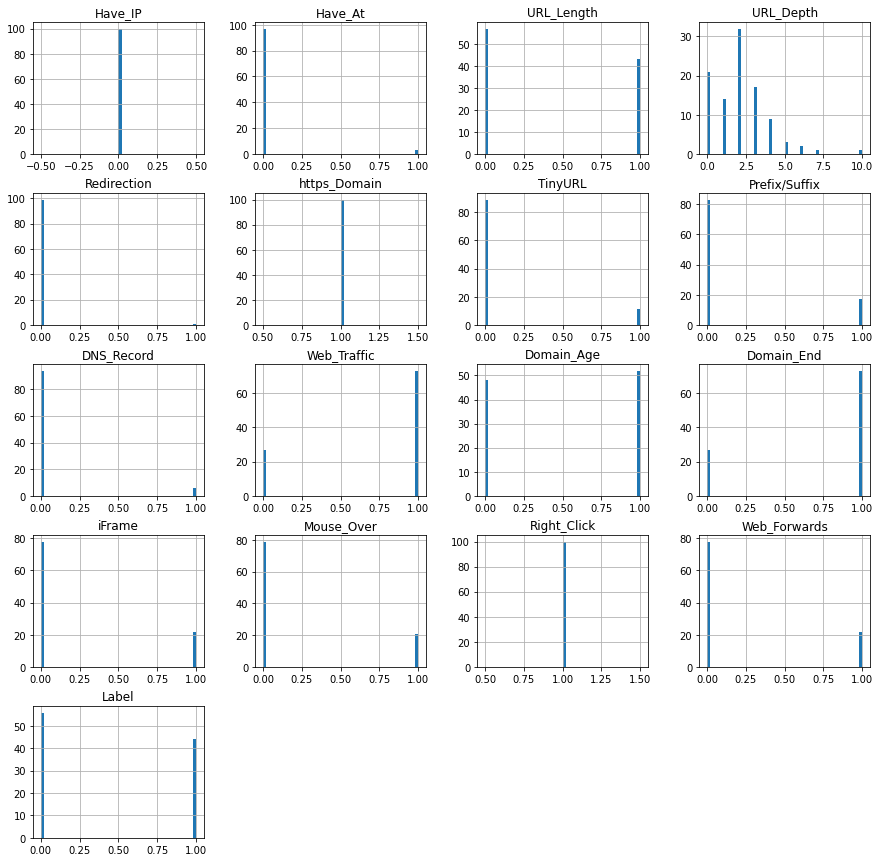

In [49]:
from matplotlib import pyplot as plt

#Plotting the data distribution
df_phis_legit.hist(bins = 50,figsize = (15,15))
plt.show()

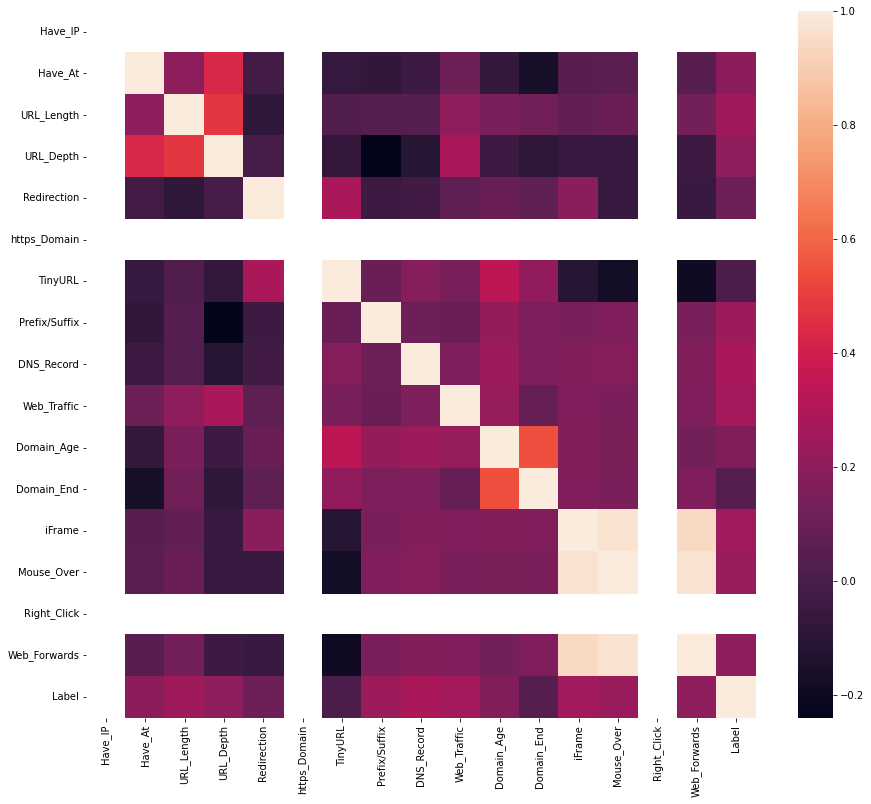

In [52]:
import seaborn as sns

#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df_phis_legit.corr())
plt.show()

## d. Tiền xử lý dữ liệu & EDA
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [53]:
df_phis_legit.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,100.0,100.000000,100.00000,100.000000,100.00,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.0,100.000000,100.000000
mean,0.0,0.030000,0.43000,2.090000,0.01,1.0,0.110000,0.170000,0.060000,0.730000,0.520000,0.730000,0.220000,0.21000,1.0,0.220000,0.440000
std,0.0,0.171447,0.49757,1.735517,0.10,0.0,0.314466,0.377525,0.238683,0.446196,0.502117,0.446196,0.416333,0.40936,0.0,0.416333,0.498888
min,0.0,0.000000,0.00000,0.000000,0.00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.00000,1.000000,0.00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000
50%,0.0,0.000000,0.00000,2.000000,0.00,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.0,0.000000,0.000000
75%,0.0,0.000000,1.00000,3.000000,0.00,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.0,0.000000,1.000000
max,0.0,1.000000,1.00000,10.000000,1.00,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [54]:
#Drop Domain column
data = df_phis_legit.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [56]:
#check data null 
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [57]:
# shuffling the rows 
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,1
1,0,0,1,3,0,1,0,0,0,1,1,1,0,0,1,0,0
2,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0
3,0,0,0,3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0


## e. Chia dữ liệu

In [58]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((100, 16), (100,))

In [59]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((80, 16), (20, 16))

## f. Đào tạo mô hình học máy
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### i. Decision Tree Classifier

In [62]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
#predicting 
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [64]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.800
Decision Tree: Accuracy on test Data: 0.600


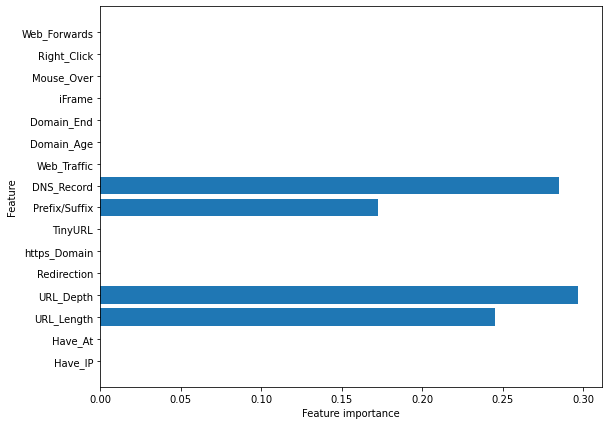

In [65]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [66]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### ii. Random Forest Classifier

In [67]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate 
forest = RandomForestClassifier(max_depth=5)

# fit 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [68]:
#predicting 
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [69]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.838
Random forest: Accuracy on test Data: 0.600


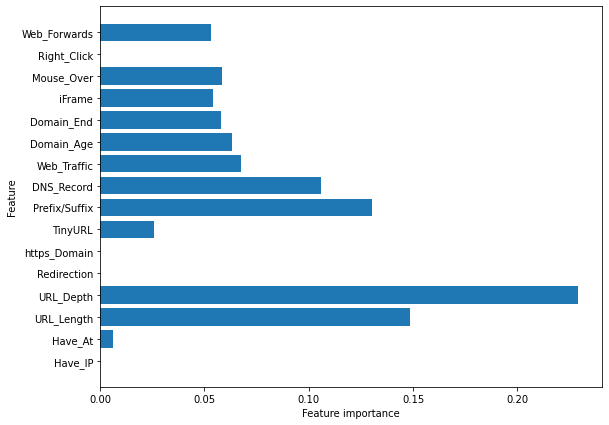

In [70]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [71]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### iii. Multilayer Perceptrons (MLPs) - Học sâu

In [72]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate 
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit  
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [73]:
#predicting 
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [74]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.900
Multilayer Perceptrons: Accuracy on test Data: 0.600


**Lưu trữ kết quả**

In [75]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### iv. XGBoost Classifier

In [76]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [77]:
#predicting 
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [78]:
#computing the accuracy 
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.900
XGBoost : Accuracy on test Data: 0.500


**Lưu trữ kết quả**

In [79]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### v. Autoencoder Neural Network

In [111]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 16  # 32 floats -> Lấy số chiều input của mình là 16, sau khi bỏ 'Domain' và 'label' và chia cho 24.5
# nhưng số chiều encoding không được là số thập phân nên mình lấy giá trị 16. 
# Theo nhiều nguồn tham khảo thì `encoding_dim` nên là 7, 16, 32

# Đây là input image đối với dữ liệu dạng ảnh. Mình có thể sử dụng lại cho mô hình phân loại của chúng
input_img = keras.Input(shape=(16,)) # Chỉnh lại số chiều input theo dữ liệu của mình, sau khi bỏ 'Domain' và 'label' thì còn 16 cột.

# "encoded" là layer dạng encode đại diện cho input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" là layer dạng  lossy reconstruction của input.
decoded = layers.Dense(16, activation='sigmoid')(encoded) # Chỉnh lại theo số chiều dữ liệu của mình ở đây

#  model sẽ maps (ánh xạ) một input vào một reconstruction
autoencoder = keras.Model(input_img, decoded)

In [112]:
# Còn model này sẽ map input thành bản bị encoded của nó
encoder = keras.Model(input_img, encoded)

In [113]:
# Đây là input (đã bị encoded) với số chiều 16 
encoded_input = keras.Input(shape=(encoding_dim,))
# Lấy output layer từ model Autoencoder
decoder_layer = autoencoder.layers[-1]
# Tạo model Decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [114]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                #validation_split=0.2,
                validation_data=(X_test, X_test)
                )

Epoch 1/50
1/1 [==============================] - 1s 658ms/step - loss: 0.7188 - accuracy: 0.0750 - val_loss: 0.7143 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.7138 - accuracy: 0.0750 - val_loss: 0.7091 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 0.7088 - accuracy: 0.0750 - val_loss: 0.7040 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.7038 - accuracy: 0.0750 - val_loss: 0.6989 - val_accuracy: 0.0500
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6989 - accuracy: 0.0875 - val_loss: 0.6938 - val_accuracy: 0.0500
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6939 - accuracy: 0.0875 - val_loss: 0.6888 - val_accuracy: 0.0500
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6890 - accuracy: 0.0875 - val_loss: 0.6838 - val_accuracy: 0.0500
Epoch 8/50
1/1

In [116]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

1/1 [==============================] - 0s 19ms/step - loss: 0.4574 - accuracy: 0.6000

Autoencoder: Accuracy on training Data: 0.575
Autoencoder: Accuracy on test Data: 0.600


In [117]:
storeResults('Autoencoder Neural Network', acc_train_auto, acc_test_auto)

### vi. Support Vector Machines

In [87]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Accuracy: ", round((tp + tn) / (tp + tn + fp + fn), 8))
print('False positive rate(FPR): ', round(fp / (fp + tn), 8))
print('False negative rate(FN): ', round(fn / (fn + tp), 8))
recall = round(tp / (tp + fn), 8)
print('Recall(TPR): ', recall)
precision = round(tp / (tp + fp), 8)
print('Precision: ', precision)
print('F1 score: ', round((2 * precision * recall) / (precision + recall), 8))

Accuracy:  0.55
False positive rate(FPR):  0.25
False negative rate(FN):  0.58333333
Recall(TPR):  0.41666667
Precision:  0.71428571
F1 score:  0.52631579


In [89]:
#predicting 
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [90]:
#computing the accuracy 
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_svm))

XGBoost: Accuracy on training Data: 0.787
XGBoost : Accuracy on test Data: 0.550


In [91]:
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

## g. So sánh các mô hình

In [118]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.800,0.60
1,Random Forest,0.838,0.60
2,Multilayer Perceptrons,0.900,0.60
3,XGBoost,0.900,0.50
4,Autoencoder Neural Network,0.387,0.45
5,Support Vector Machines,0.788,0.55
6,Autoencoder Neural Network,0.575,0.60


Performance cho ra thấp hơn so với dataset trên. Bởi vì số lượng input sample khá ít, chỉ **100 mẫu**.

In [93]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.900,0.60
1,Random Forest,0.838,0.60
0,Decision Tree,0.800,0.60
5,Support Vector Machines,0.788,0.55
3,XGBoost,0.900,0.50
4,Autoencoder Neural Network,0.387,0.45


Lưu trữ model của keras của mục [7.5](#scrollTo=7_5_Autoencoder_Neural_Network)

In [96]:
autoencoder.save("/content/drive/MyDrive/Lab/Lab4/Output Model/AutoencoderNN_otherdataset.h5")

In [97]:
!ls "/content/drive/MyDrive/Lab/Lab4/Output Model/"

AutoencoderNN.h5  AutoencoderNN_otherdataset.h5


# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites